In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [40]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

df = pd.read_csv('/kaggle/input/all-kaggle-datasets/kaggle_datasets.csv')

In [38]:
df.head()

,title,description,url,owner,kernels,discussions,views,downloads,last_updated,license,size,featured,super_featured,upvotes
0,Trending YouTube Video Statistics (UPDATED),"Daily statistics (views, likes, category, tags...",https://www.kaggle.com/datasnaek/youtube-new,Mitchell J,3,4,9484,1668,2018-01-16,CC0,35087677.0,1,0,46
59,Aviation Accident Database & Synopses,The NTSB aviation accident dataset,https://www.kaggle.com/khsamaha/aviation-accid...,Kheirallah Samaha,95,16,16786,2248,2018-01-15,CC0,3908294.0,1,0,35
60,U.S. Educational Finances,Revenues and expenditures for U.S. grade schoo...,https://www.kaggle.com/noriuk/us-educational-f...,Roy Garrard,1,0,1192,155,2018-01-15,CC0,84734393.0,1,0,8
61,UFC PPV Sales,Contains PPV Sales for UFC PPV's Dating Back t...,https://www.kaggle.com/daverosenman/ufc-ppv-sales,DaveRosenman,1,0,822,93,2018-01-15,Other,6243.0,0,0,5
172,Fruits 360 dataset,A dataset with 46 fruits and 29229 images,https://www.kaggle.com/moltean/fruits,Mihai Oltean,2,0,2275,312,2018-01-14,CC4,148099066.0,1,0,26


In [30]:
df.shape

(1695, 14)

In [41]:
df.isnull().sum()

title                2
description       4951
url                  0
owner                0
kernels              0
discussions          0
views                0
downloads            0
last_updated         0
license              0
size                 1
featured             0
super_featured       0
upvotes              0
dtype: int64

In [33]:
df = df[(df['kernels'] > 0) & (df['upvotes'] > 0)]

In [42]:
(df['kernels'] == 0).sum() 

5450

In [43]:
(df['upvotes']==0).sum()

5484

In [44]:
(df == 0).sum() 

title                0
description          0
url                  0
owner                0
kernels           5450
discussions       6767
views               20
downloads         2466
last_updated         0
license              0
size                12
featured          6783
super_featured    8016
upvotes           5484
dtype: int64

In [10]:
df.shape 

(1695, 14)

In [11]:
df.describe()

,kernels,discussions,views,downloads,size,featured,super_featured,upvotes
count,1695.000000,1695.000000,1695.000000,1695.000000,1.694000e+03,1695.000000,1695.000000,1695.000000
mean,26.432448,2.658997,8216.589381,1035.418879,2.207753e+09,0.604720,0.011799,24.444838
std,127.644147,7.364795,24845.018012,3404.237561,8.192042e+10,0.489055,0.108014,67.213139
min,1.000000,0.000000,9.000000,0.000000,6.600000e+01,0.000000,0.000000,1.000000
25%,1.000000,0.000000,893.500000,73.000000,2.767392e+05,0.000000,0.000000,3.000000
50%,3.000000,1.000000,2264.000000,220.000000,4.310938e+06,1.000000,0.000000,8.000000
75%,11.000000,2.000000,5814.000000,675.500000,6.056287e+07,1.000000,0.000000,19.000000
max,3390.000000,113.000000,429745.000000,59399.000000,3.371476e+12,1.000000,1.000000,1131.000000


(array([1.608e+03, 5.300e+01, 1.500e+01, 1.200e+01, 0.000e+00, 2.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 2.000e+00]),
 array([  0. ,  11.3,  22.6,  33.9,  45.2,  56.5,  67.8,  79.1,  90.4,
        101.7, 113. ]),
 <BarContainer object of 10 artists>)

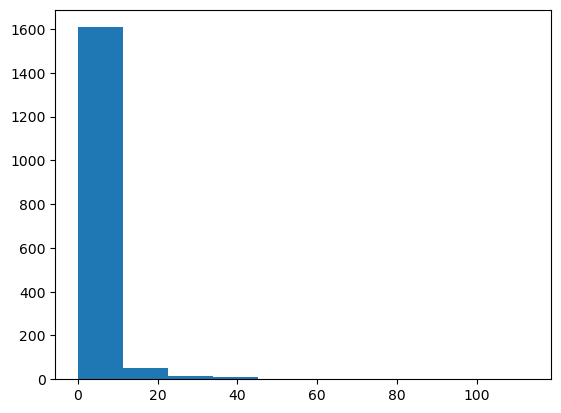

In [12]:
plt.hist(df['discussions']) #using the matlplotlib 

<Axes: ylabel='Frequency'>

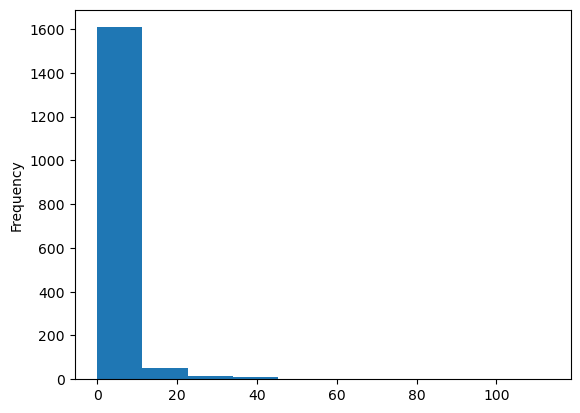

In [13]:
df['discussions'].plot(kind = 'hist') #using pandas

In [35]:
df.nlargest(10, 'discussions')[['title','discussions']]

,title,discussions
7869,European Soccer Database,113
7702,Human Resources Analytics,103
7929,Iris Species,90
5715,TMDB 5000 Movie Dataset,89
7822,Credit Card Fraud Detection,73
7074,2013 American Community Survey,64
8018,Meta Kaggle,58
7069,Climate Change: Earth Surface Temperature Data,43
7981,Pokemon with stats,43
6238,Medical Appointment No Shows,42


(array([1.673e+03, 1.600e+01, 1.000e+00, 0.000e+00, 2.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.0000e+00, 3.3990e+02, 6.7880e+02, 1.0177e+03, 1.3566e+03,
        1.6955e+03, 2.0344e+03, 2.3733e+03, 2.7122e+03, 3.0511e+03,
        3.3900e+03]),
 <BarContainer object of 10 artists>)

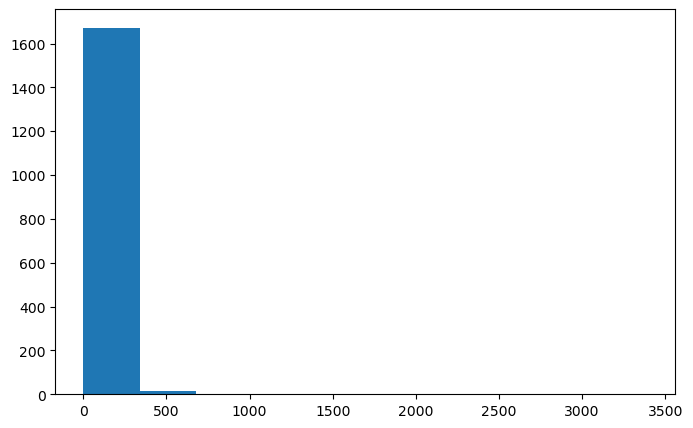

In [15]:
plt.figure(figsize = (8,5))
plt.hist(df['kernels'])

(array([712., 241., 145., 102.,  49.,  47.,  36.,  22.,  26.,  32.]),
 array([ 0. ,  2.1,  4.2,  6.3,  8.4, 10.5, 12.6, 14.7, 16.8, 18.9, 21. ]),
 <BarContainer object of 10 artists>)

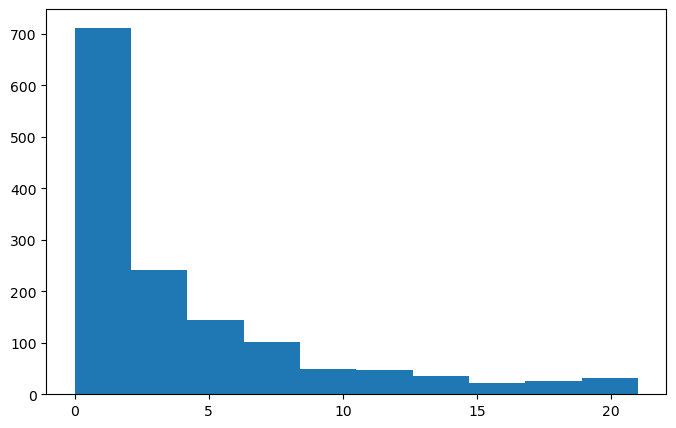

In [16]:
plt.figure(figsize = (8, 5))
plt.hist(df['kernels'],range =[0,21] )

(array([1220.,  173.,   84.,   48.,   21.,   10.,   14.,   13.,   16.,
          14.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

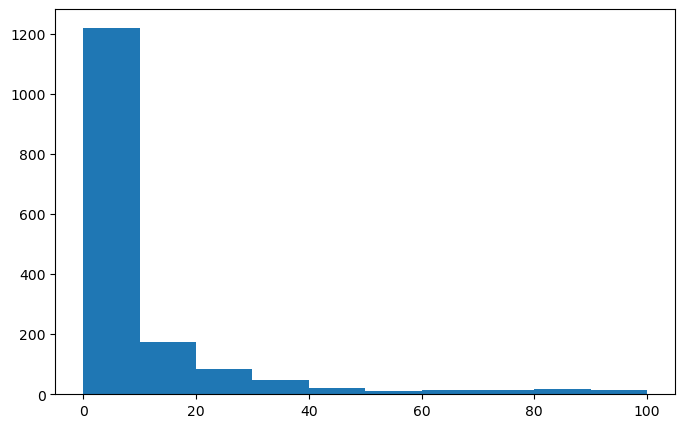

In [17]:
plt.figure(figsize = (8, 5))
plt.hist(df['kernels'],range = [0, 100], bins = 10)

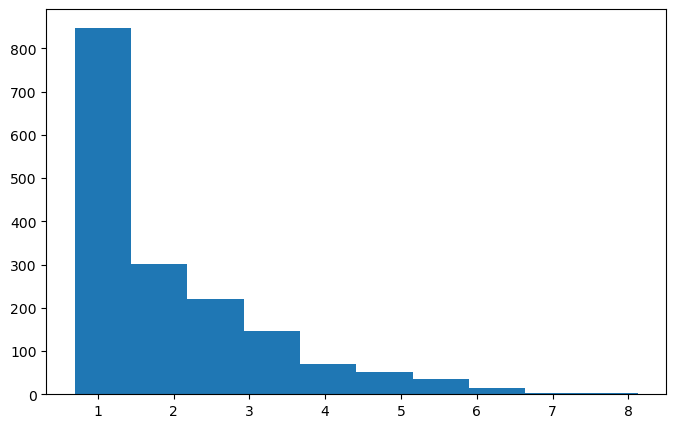

In [18]:
import numpy as np #taking logarithms on the x-axis 
plt.figure(figsize = (8, 5))
plt.hist(np.log1p(df['kernels'])) 
plt.show()

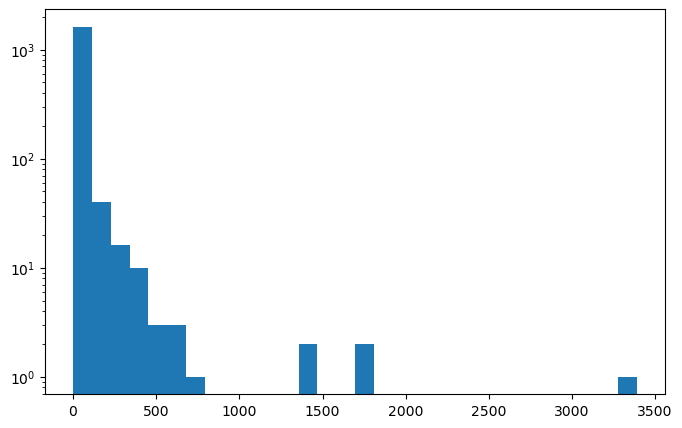

In [19]:
plt.figure(figsize =(8, 5)) #taking logarithms on the y-axis
plt.hist(df['kernels'],bins = 30, log = True)
plt.show()

In [ ]:
plt.figure(figsize =(8, 5))
plt.hist(df['kernels'], bins = 30, log = True, color ='fuchsia')
plt.title("Distrubtion of kernels created", fontsize = 16)
plt.xlabel('no of kernels')
plt.ylabel('frequency')
plt.show()


****KDE Plots**** (kernel density estimate)

In [20]:
df.columns 

Index(['title', 'description', 'url', 'owner', 'kernels', 'discussions',
       'views', 'downloads', 'last_updated', 'license', 'size', 'featured',
       'super_featured', 'upvotes'],
      dtype='object')

<Axes: ylabel='Density'>

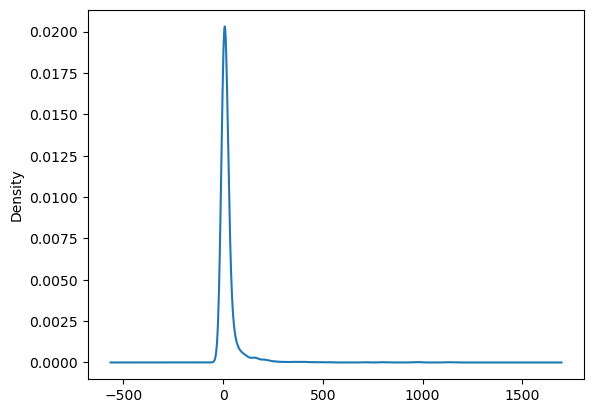

In [21]:
df['upvotes'].plot.kde()

<Axes: ylabel='Density'>

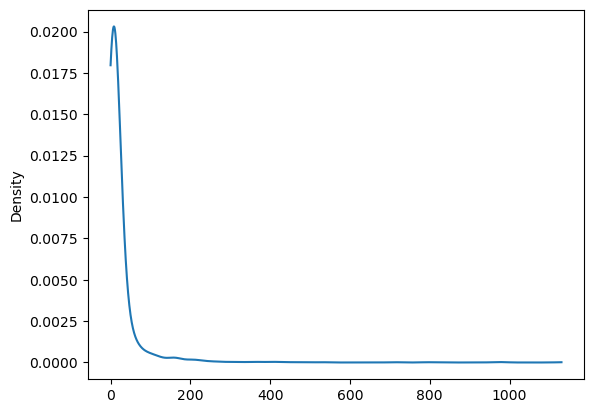

In [22]:
df['upvotes'].plot.kde(ind = np.arange(0,df['upvotes'].max()))

<Axes: xlabel='upvotes', ylabel='Density'>

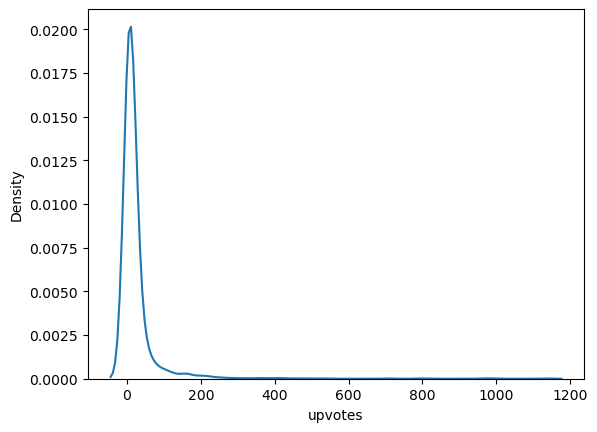

In [23]:
sns.kdeplot(df['upvotes'])

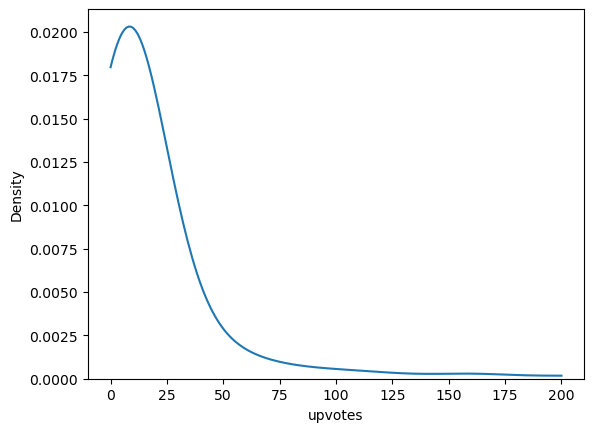

In [24]:
sns.kdeplot(df['upvotes'], clip =(0, 200)); 

In [ ]:
plt.figure(figsize =(8,5)) #lets say 
sns.kdeplot(df.loc[df['featured'] == 0, 'upvotes'], color = 'green', label ='non -featured')
sns.kdeplot(df.loc[df['featured'] == 1, 'upvotes'], color = 'red', label ='featured')
plt.xlim(0,100)
plt.show()
                   
                   
                   

In [ ]:
plt.figure(figsize =(8,5)) # do it with matplotlib
df.loc[df['featured']== 1,'upvotes'].plot.kde(color = 'red')
df.loc[df['featured']== 0,'upvotes'].plot.kde(color ='green')  
plt.legend(('yes', 'no'), title = 'featured?')
plt.xlim(0, 100)
plt.show()
            
            